In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv')

In [3]:
X_code = df.drop(['target'], axis=1).values
y = df['target'].values
X_code_train, X_code_val, y_train, y_val = train_test_split(X_code, y, test_size= 0.2, random_state=0, stratify=y)

X_train = X_code_train[:,1:].astype(np.float)
code_train = X_code_train[:,0]
X_val = X_code_val[:,1:].astype(np.float)
code_val = X_code_val[:,0]

In [4]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
prior = y_train.mean()
priors = np.array([1-prior, prior])

In [6]:
neg_mask_train = y_train ==0
pos_mask_train = y_train == 1
neg_mask_val = y_val == 0
pos_mask_val = y_val == 1

In [7]:
def try_clf(clf, n=10):
    clf.fit(X_train[:,:n], y_train)

    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.hist(clf.predict_proba(X_train[:,:n])[:,1][neg_mask_train], bins=100, alpha=0.5)
    plt.hist(clf.predict_proba(X_train[:,:n])[:,1][pos_mask_train], bins=100, alpha=0.5)
    plt.ylim(0,400)

    plt.subplot(1,2,2)
    plt.hist(clf.predict_proba(X_val[:,:n])[:,1][neg_mask_val], bins=100, alpha=0.5)
    plt.hist(clf.predict_proba(X_val[:,:n])[:,1][pos_mask_val], bins=100, alpha=0.5)
    plt.ylim(0,100)
    plt.show()

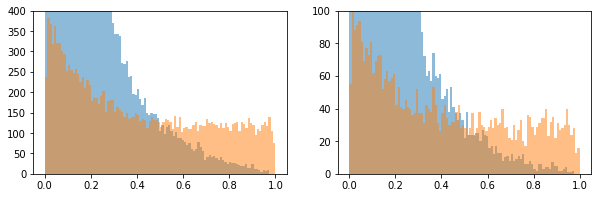

In [8]:
clf = GaussianNB(priors=priors)
n = 200
try_clf(clf=clf, n=n)

In [9]:
clfs = [LogisticRegression(),
        GaussianNB(priors=priors),
        MLPClassifier(),
        MLPClassifier(activation='logistic'),
        MLPClassifier(activation='logistic', hidden_layer_sizes=(100,50))
]

In [13]:
for clf in clfs:
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
    auc_train = metrics.auc(fpr_train, tpr_train)

    y_val_pred = clf.predict_proba(X_val)[:,1]
    fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
    auc_val = metrics.auc(fpr_val, tpr_val)

    print('------------------')
    print(auc_train)
    print(auc_val)

------------------
0.8612851774511059
0.8586026717441144
------------------
0.890172177425396
0.8883312522988172
------------------
0.902817915225082
0.8314924336073939
------------------
0.8487979044308218
0.8392602095138537
------------------
0.8472636745769184
0.8451331032442014


In [14]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

y_val_pred = clf.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.8190371936548767
0.8009930268059369


In [17]:
from sklearn.calibration import CalibratedClassifierCV

In [20]:
clf =  MLPClassifier(activation='logistic', hidden_layer_sizes=(100,50))
cal = CalibratedClassifierCV(base_estimator=clf)
cal.fit(X_train, y_train)

y_train_pred = cal.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

y_val_pred = cal.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.8499027650184368
0.8457618591312476


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()
# clf.fit(X_train, y_train)
# y_train_pred = clf.predict_proba(X_train)[:,1]
# fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
# auc_train = metrics.auc(fpr_train, tpr_train)

# y_val_pred = clf.predict_proba(X_val)[:,1]
# fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
# auc_val = metrics.auc(fpr_val, tpr_val)

# print('------------------')
# print(auc_train)
# print(auc_val)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_leaf=100, max_depth=20, min_samples_split=10)
clf.fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

y_val_pred = clf.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.8686424198786519
0.7800228775522058


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

y_val_pred = clf.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.8597241491564867
0.8287936014756677


In [60]:
clf = GaussianNB(priors=priors)
clf.fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

y_val_pred = clf.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.890172177425396
0.8883312522988172


In [24]:
y_val_pred[pos_mask_val][y_val_pred[pos_mask_val] < 0.5]

array([0.02056728, 0.07602931, 0.13104009, ..., 0.02781206, 0.13415788,
       0.063424  ])

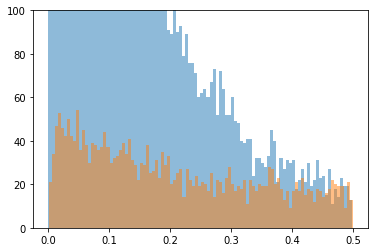

In [52]:
plt.hist(y_val_pred[neg_mask_val][y_val_pred[neg_mask_val] < 0.5], bins=100, alpha=0.5)
plt.hist(y_val_pred[pos_mask_val][y_val_pred[pos_mask_val] < 0.5], bins=100, alpha=0.5)
plt.ylim(0,100)
plt.show()

In [58]:
import lightgbm as lgb
params = {
    'objective': 'binary',
    'boost_from_average':False,
    'metric': 'auc',
    'boosting_type': 'gbdt', }
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [59]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_val,
                num_boost_round=2000,
                early_stopping_rounds=30,
                verbose_eval = 200) 

Training until validation scores don't improve for 30 rounds.
[200]	valid_0's auc: 0.878018
[400]	valid_0's auc: 0.887203
Early stopping, best iteration is:
[396]	valid_0's auc: 0.887248


In [84]:
y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.980663391084844
0.8872483469257381


In [80]:
clf = GaussianNB(priors=priors)
clf.fit(X_train_low, y_train_low)
y_train_pred = clf.predict_proba(X_train_low)[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_low, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

y_val_pred = clf.predict_proba(X_val)[:,1]
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.816655434285226
0.8857502094861986


In [134]:
low_score_mask_neg_train = gbm1.predict(X_train)[neg_mask_train] < 0.1
low_score_mask_pos_train = gbm1.predict(X_train)[pos_mask_train] < 0.1

In [135]:
low_score_neg_train = X_train[neg_mask_train][low_score_mask_neg_train]
low_score_pos_train = X_train[pos_mask_train][low_score_mask_pos_train]

In [136]:
low_score_pos_train.shape

(2945, 200)

In [137]:
X_train_low = np.vstack([low_score_neg_train, low_score_pos_train])
y_train_low = np.hstack([np.zeros(low_score_neg_train.shape[0]),
                         np.ones(low_score_pos_train.shape[0])])

In [138]:
lgb_train_low = lgb.Dataset(X_train_low, y_train_low)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

gbm1 = lgb.train(params,
                lgb_train_low,
                valid_sets=lgb_val,
                num_boost_round=2000,
                early_stopping_rounds=30,
                verbose_eval = 200) 

Training until validation scores don't improve for 30 rounds.
[200]	valid_0's auc: 0.731098
Early stopping, best iteration is:
[294]	valid_0's auc: 0.737269


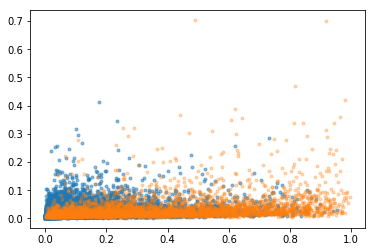

In [139]:
plt.plot(gbm.predict(X_val, num_iteration=gbm.best_iteration)[neg_mask_val],
         gbm1.predict(X_val, num_iteration=gbm.best_iteration)[neg_mask_val], ls='', marker='.', alpha=0.5)

plt.plot(gbm.predict(X_val, num_iteration=gbm.best_iteration)[pos_mask_val],
         gbm1.predict(X_val, num_iteration=gbm.best_iteration)[pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()

In [86]:
y_val_pred = gbm1.predict(X_val, num_iteration=gbm.best_iteration)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

y_train_pred = gbm1.predict(X_train, num_iteration=gbm.best_iteration)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

print('------------------')
print(auc_train)
print(auc_val)

------------------
0.9827923884991822
0.8679250564852226


In [17]:
from sklearn.ensemble import VotingClassifier
estims = [('lr', clfs[0]), ('gnb', clfs[1]), ('MLP0', clfs[2]), ('MLP1', clfs[3]), ('MLP2', clfs[4])]
vote = VotingClassifier(estimators=estims, voting='soft')
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('gnb', Gaussi...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

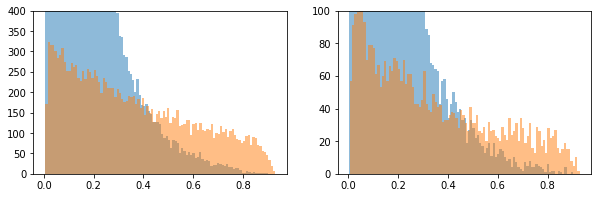

In [18]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(vote.predict_proba(X_train)[:,1][neg_mask_train], bins=100, alpha=0.5)
plt.hist(vote.predict_proba(X_train)[:,1][pos_mask_train], bins=100, alpha=0.5)
plt.ylim(0,400)

plt.subplot(1,2,2)
plt.hist(vote.predict_proba(X_val)[:,1][neg_mask_val], bins=100, alpha=0.5)
plt.hist(vote.predict_proba(X_val)[:,1][pos_mask_val], bins=100, alpha=0.5)
plt.ylim(0,100)
plt.show()

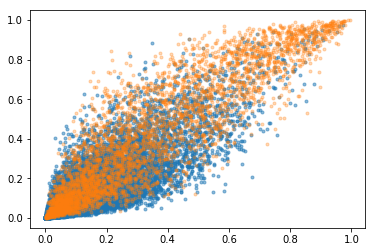

In [28]:
plt.plot(clfs[0].predict_proba(X_val)[:,1][neg_mask_val], clfs[1].predict_proba(X_val)[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clfs[0].predict_proba(X_val)[:,1][pos_mask_val], clfs[1].predict_proba(X_val)[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()

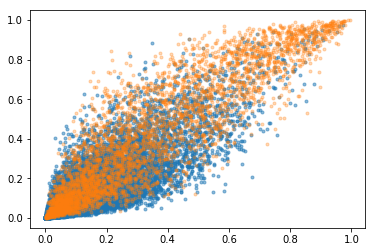

In [28]:
plt.plot(clfs[1].predict_proba(X_val[:,:n])[:,1][neg_mask_val], clfs[2].predict_proba(X_val[:,:n])[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clfs[1].predict_proba(X_val[:,:n])[:,1][pos_mask_val], clfs[2].predict_proba(X_val[:,:n])[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()#ガウシアンNBとロジスティック回帰の違い

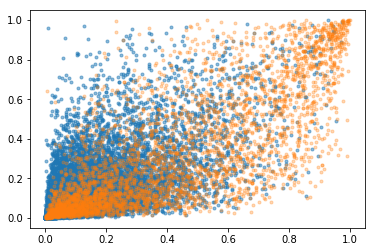

In [31]:
plt.plot(clfs[2].predict_proba(X_val[:,:n])[:,1][neg_mask_val], clfs[3].predict_proba(X_val[:,:n])[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clfs[2].predict_proba(X_val[:,:n])[:,1][pos_mask_val], clfs[3].predict_proba(X_val[:,:n])[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()#ガウシアンNBとMLPの違い

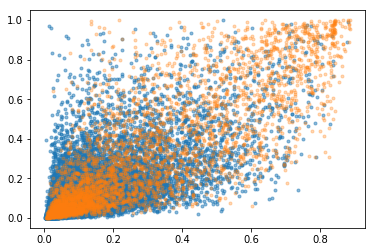

In [33]:
plt.plot(clf4.predict_proba(X_val[:,:n])[:,1][neg_mask_val], clf3.predict_proba(X_val[:,:n])[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clf4.predict_proba(X_val[:,:n])[:,1][pos_mask_val], clf3.predict_proba(X_val[:,:n])[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()#活性化関数での違い

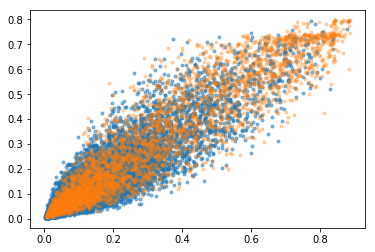

In [37]:
plt.plot(clf4.predict_proba(X_val[:,:n])[:,1][neg_mask_val], clf5.predict_proba(X_val[:,:n])[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clf4.predict_proba(X_val[:,:n])[:,1][pos_mask_val], clf5.predict_proba(X_val[:,:n])[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()#ネットワーク構造の違い

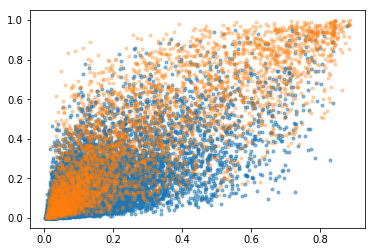

In [38]:
plt.plot(clf4.predict_proba(X_val[:,:n])[:,1][neg_mask_val], clf2.predict_proba(X_val[:,:n])[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clf4.predict_proba(X_val[:,:n])[:,1][pos_mask_val], clf2.predict_proba(X_val[:,:n])[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()

In [ ]:
plt.plot(clf1.predict_proba(X_val[:,:n])[:,1][neg_mask_val], clf6.predict_proba(X_val[:,:n])[:,1][neg_mask_val], ls='', marker='.', alpha=0.5)
plt.plot(clf1.predict_proba(X_val[:,:n])[:,1][pos_mask_val], clf6.predict_proba(X_val[:,:n])[:,1][pos_mask_val], ls='', marker='.', alpha=0.3)
plt.show()